In [65]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


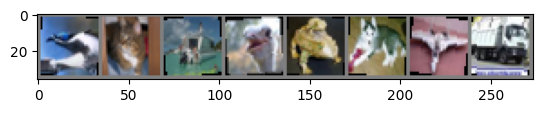

In [91]:
def imshow(img):
    img = img * 0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:8]))
    break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [97]:
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_features, 128),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    )
    return model

+ Khởi tạo hàm loss function và phương thức optimizer

In [93]:
n_features = 32 * 32 * 3# Đối với ảnh trong tập FashionMNIST thì size ảnh là 28x28 => Số lượng feature trong ảnh là 28 * 28 = 784
model = getModel(n_features)
lr = 0.01
optim = SGD(params = model.parameters(), lr = lr)
loss_fn = nn.CrossEntropyLoss()
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=10, bias=True)
)

+ Xây dựng hàm đánh giá model

In [94]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [96]:
n_epochs = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
	running_loss = 0.0
	running_correct = 0
	total = 0
	model.train()
	for i, (inputs, labels) in enumerate(trainloader, 0):
		inputs, labels = inputs.to(device), labels.to(device)

		optim.zero_grad()

		outputs = model(inputs)
		loss = loss_fn(outputs, labels)
		loss.backward()
		optim.step()

		running_loss += loss.item()
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		running_correct += (predicted == labels).sum().item()

	epoch_accuracy = 100 * running_correct / total
	epoch_loss = running_loss / (i + 1)
	test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
	print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

	train_losses.append(epoch_loss)
	train_accuracies.append(epoch_accuracy)
	test_losses.append(test_loss)
	test_accuracies.append(test_accuracy)

Epoch [1/100], Loss: 1.4853, Accuracy: 47.41%, Test Loss: 1.4625, Test Accuracy: 48.40%
Epoch [2/100], Loss: 1.4346, Accuracy: 49.31%, Test Loss: 1.4319, Test Accuracy: 49.45%
Epoch [3/100], Loss: 1.3928, Accuracy: 50.91%, Test Loss: 1.3931, Test Accuracy: 51.05%
Epoch [4/100], Loss: 1.3554, Accuracy: 52.13%, Test Loss: 1.3581, Test Accuracy: 52.36%
Epoch [5/100], Loss: 1.3281, Accuracy: 53.28%, Test Loss: 1.3467, Test Accuracy: 52.95%
Epoch [6/100], Loss: 1.2983, Accuracy: 54.17%, Test Loss: 1.3204, Test Accuracy: 53.63%
Epoch [7/100], Loss: 1.2740, Accuracy: 55.00%, Test Loss: 1.3111, Test Accuracy: 53.79%
Epoch [8/100], Loss: 1.2505, Accuracy: 55.96%, Test Loss: 1.2954, Test Accuracy: 54.37%
Epoch [9/100], Loss: 1.2318, Accuracy: 56.37%, Test Loss: 1.3022, Test Accuracy: 54.48%
Epoch [10/100], Loss: 1.2095, Accuracy: 57.22%, Test Loss: 1.2815, Test Accuracy: 54.66%
Epoch [11/100], Loss: 1.1924, Accuracy: 58.01%, Test Loss: 1.2892, Test Accuracy: 54.58%
Epoch [12/100], Loss: 1.1722, 

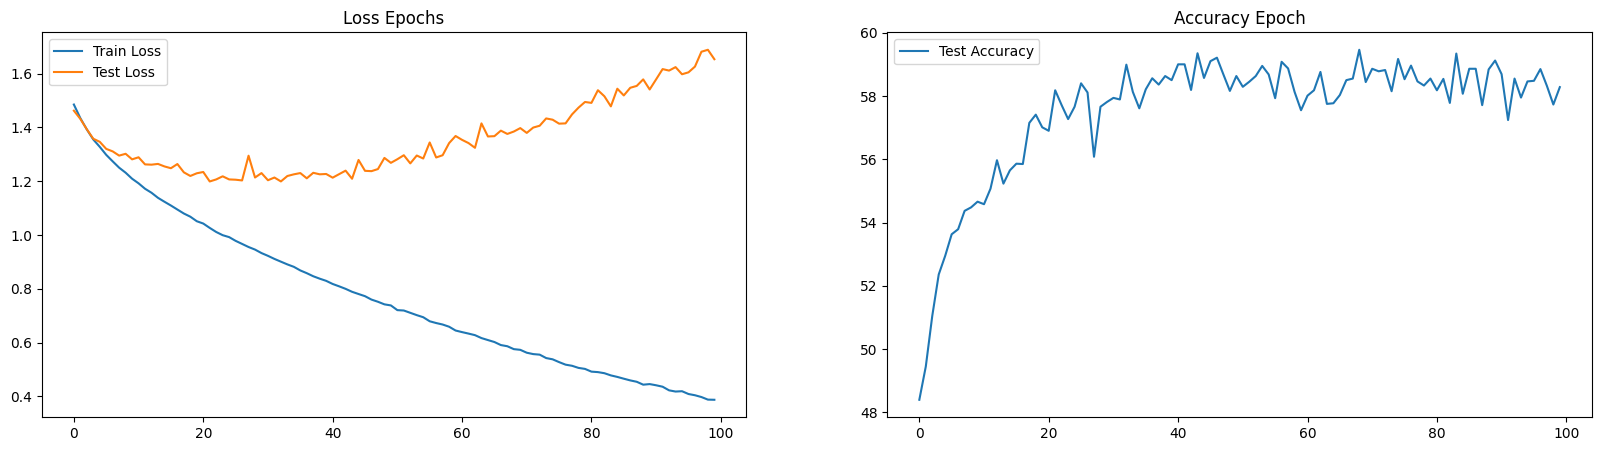

In [98]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [99]:
def zScoreScaling(tensor):
  mean = tensor.mean(axis=0, keepdims=True)
  std = tensor.std(axis=0, keepdims=True)
  return (tensor - mean) / std

In [100]:
def minMaxScaling(tensor):
  min = tensor.min(axis=0, keepdims=True).values
  max = tensor.max(axis=0, keepdims=True).values
  return (tensor - min) / (max - min)

In [101]:
class Linear:
  def __init__(self, in_features, out_features):
    self.weight = torch.randn(in_features, out_features)
    self.bias = torch.randn(1, out_features)

  def forward(self, x):
    return x @ self.weight + self.bias


In [102]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])
tensor([[0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.5000],
        [1.0000, 1.0000, 1.0000]])


![image.png](attachment:image.png)

In [103]:
tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")

tensor([[-4.0463, -1.9962]])
Weight = tensor([[ 0.2913,  0.3868],
        [-2.3492,  0.5947],
        [ 0.3154, -1.6035]])
Bias = tensor([[-0.5853,  1.2382]])
